In [2]:
import os
os.chdir('/content/drive/MyDrive/ML/Data')

In [3]:
!pwd

/content/drive/MyDrive/ML/Data


In [4]:
import pandas as pd
csv_data = pd.read_csv('iris.csv')

In [5]:
csv_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data = csv_data[['SepalLength',	'SepalWidth',	'PetalLength',	'PetalWidth']]
iris_target = csv_data['Name']
print(iris_data.shape)

(150, 4)


In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(iris_data, iris_target, random_state=42)
print(train_data.shape, test_data.shape)

(112, 4) (38, 4)


In [9]:
from sklearn.svm import SVC
model = SVC()
model.fit(train_data, train_target)
print(f'테스트데이터의 정확도{model.score(test_data, test_target)}')

테스트데이터의 정확도1.0


In [11]:
pred_csv = pd.read_csv('iris_test.csv')
pred_data = pred_csv[['SepalLength',	'SepalWidth',	'PetalLength',	'PetalWidth']]
pred_target = pred_csv['Name']
print(model.predict(pred_data))

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


In [12]:
print(pred_target)

0        Iris-setosa
1        Iris-setosa
2    Iris-versicolor
3     Iris-virginica
4     Iris-virginica
5        Iris-setosa
6        Iris-setosa
7    Iris-versicolor
8        Iris-setosa
9     Iris-virginica
Name: Name, dtype: object


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_target, model.predict(pred_data))
print(cm)

[[5 0 0]
 [0 2 0]
 [0 0 3]]


In [14]:
from sklearn.model_selection import GridSearchCV
params = {'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
          'C':[0.001, 0.01, 0.1, 1, 10, 100],
          'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(SVC(), params, cv=5)
gs.fit(train_data, train_target)
print(gs.best_params_, gs.best_score_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'} 0.9727272727272727


In [15]:
#최적의 커널과 하이퍼파라미터로 SVM 재훈련
best_model = gs.best_estimator_
best_model.fit(train_data, train_target)
print(best_model.predict(pred_data))

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


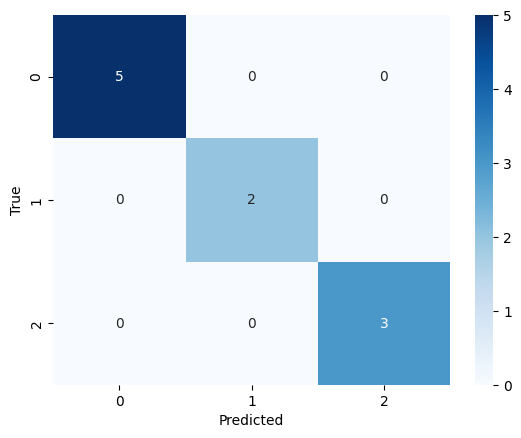

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()